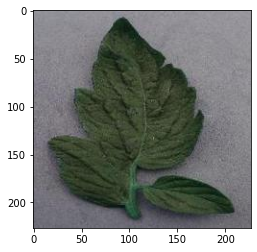

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os 
import cv2

DataDir = "C:/Users/andyl/Downloads/ngdgg79rzb-1/plantvillage/Preprocessed data/Preprocessed data"
Categories = ["Bacterial_spot227", "Early_blight227", "healthy227", "Late_blight227", "Leaf_Mold227", 
              "Septoria_leaf_spot227", "Target_Spot227", "Tomato_mosaic_virus227", 
              "Tomato_Yellow_Leaf_Curl_Virus227", "Two-spotted_spider_mite227"]

for category in Categories:
    path = os.path.join(DataDir, category) # path to covid or non covid dir
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR) # convert image into array and grayscale
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

In [2]:
training_data = []

def create_training_data():
    for category in Categories:
        path = os.path.join(DataDir, category)
        class_num = Categories.index(category) 
        for img in os.listdir(path):
            try: 
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR) 
                training_data.append([img_array, class_num])
            except Exception as e: 
                pass

create_training_data()

In [3]:
print(len(training_data))

14531


In [4]:
import random

random.shuffle(training_data) # shuffle the covid and non-covid training data

In [5]:
for sample in training_data[:10]: # print 10 of the example of training data
    print(sample[1])

0
0
6
3
9
8
9
8
8
1


In [6]:
X = []
y = []

for features, label in training_data:
    X.append(features)
    y.append(label)

Img_Size = 227

X = np.array(X).reshape(-1, Img_Size, Img_Size,3)

In [ ]:
import pickle

pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()
# save the trained data

In [ ]:
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

In [ ]:
X[1] # to read the picture features

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
import time

Name = "Tomato_Disease-cnn-64x2-{}".format(int(time.time()))

tensorboard = TensorBoard(log_dir='logs/{}'.format(Name))

X = pickle.load(open("X.pickle","rb"))
y = pickle.load(open("y.pickle","rb"))

X = np.array(X/255.0)
y = np.array(y)

model = Sequential()
model.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))

model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten()) # converts 3D features into 1D feature
model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(1))
model.add(Activation('sigmoid'))



In [ ]:
model.compile(loss="binary_crossentropy",
             optimizer="adam",
             metrics=['accuracy'])

model.fit(X, y, batch_size=32, epochs=10, validation_split=0.1, callbacks=[tensorboard])

model.save('TomatoPlantDisease-CNN.model')